mle
4149.7943904
mle
1583.97446836
mle
1577.49669373
mle
1565.11886165
mle
1577.8427421
mle
1557.01758291
mle
1590.88705903
mle
1594.7764433
mle
1575.88002176
[4149.7943904015337, 1583.9744683574741, 1577.4966937327385, 1565.1188616475351, 1577.8427420996281, 1557.0175829125649, 1590.8870590303832, 1594.7764433045504, 1575.8800217576338]
[4161.7773194957499, 1613.931791093014, 1625.4284101096025, 1631.0249716657229, 1661.7232457591399, 1658.8724802134006, 1710.7163499725427, 1732.580127888034, 1731.6580999824414]
[-2565.8199220440597, -6.4777746247355026, -12.377832085203408, 12.723880452092999, -20.825159187063264, 33.869476117818294, 3.8893842741672415]
False


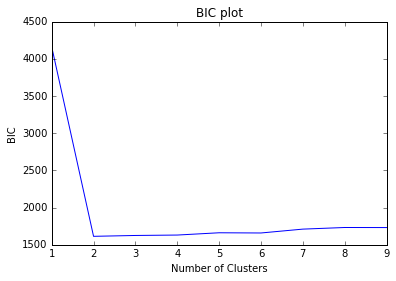

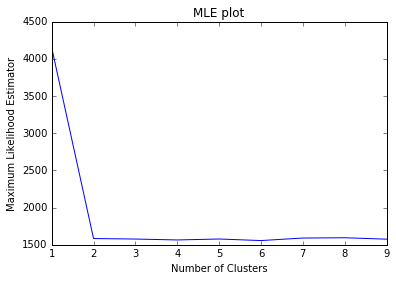

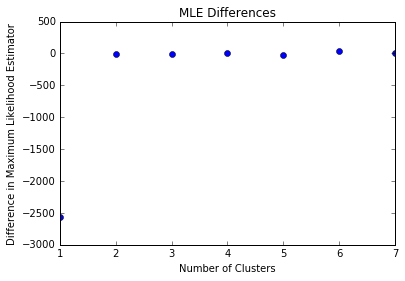

In [3]:
# %load ron_gmmtest.py
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import mixture

np.random.seed(1)

mleArr = []
bic = []
mleDifferences = []


def mle(GMM, X):
	return -2 * GMM.score(X).sum()

def verifyConcavity(arr):
	for x in xrange(0, len(arr) - 2):
		if arr[x+2] - 2*arr[x +1] + arr[x] >  0:
			return False
	return True
			
numClusters = [i for i in range(1,10)]
for x in xrange(1,10):
	g = mixture.GMM(n_components=x)
	# generate random observations with two modes centered on 0 and 100 
	obs = np.concatenate((np.random.randn(100, 1), 100 + np.random.randn(300, 1)))
	g.fit(obs)
	print 'mle'
	print mle(g, obs)
	mleArr.append(mle(g, obs))
	bic.append(g.bic(obs))

print mleArr
print bic

for x in xrange(1,len(mleArr) - 1):
	mleDifferences.append(mleArr[x] - mleArr[x-1])	

print mleDifferences
print verifyConcavity(mleDifferences)
#usually not true

plt.figure(1)
plt.plot(numClusters, bic)
plt.ylabel('BIC')
plt.xlabel('Number of Clusters')
plt.title('BIC plot')

plt.figure(2)
plt.plot(numClusters, mleArr)
plt.ylabel('Maximum Likelihood Estimator')
plt.xlabel('Number of Clusters')
plt.title('MLE plot')
# plt.show()

plt.figure(3)
plt.plot(numClusters[0:-2], mleDifferences, 'o')
plt.title('MLE Differences')
plt.ylabel('Difference in Maximum Likelihood Estimator')
plt.xlabel('Number of Clusters')
plt.show()




#bic source code, using this to define MLE function
# def bic(self, X):
# """Bayesian information criterion for the current model fit
# and the proposed data
# Parameters
# ----------
# X : array of shape(n_samples, n_dimensions)
# Returns
# -------
# bic: float (the lower the better)
# """
# return (-2 * self.score(X).sum() +
#         self._n_parameters() * np.log(X.shape[0]))




